<Container object of 3 artists>

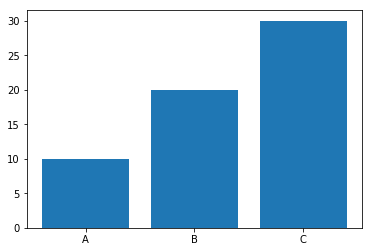

<Container object of 3 artists>

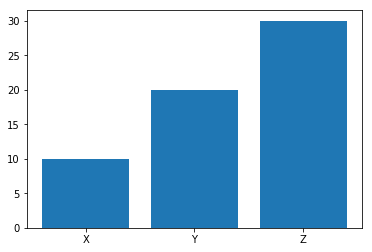

In [22]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt


# Run all output interactively
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


df = pd.DataFrame({'col1': ['A', 'B', 'C'], 'col2': ['X', 'Y', 'Z'], 'col3': [10, 20, 30]})

# This DOES NOT suppress output
cols_to_plot = ['col1', 'col2']
for col in cols_to_plot:
    fig, ax = plt.subplots()
    ax.bar(df[col], df['col3'])
    plt.show();

# This DOES suppress output
# fig, ax = plt.subplots()
# ax.bar(df[col], df['col3'])
# plt.show();

# Modelling

In [20]:
y = wine['excellent+']
X = wine.drop('excellent+', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

KeyError: 'excellent+'

In [ ]:
data = wine[['excellent+', 'country', 'variety', 'year']]
data = pd.get_dummies(data, columns = ['country', 'variety'])

X = data.drop('excellent+', axis = 1)
y = data['excellent+']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = LogisticRegressionCV(random_state = 0, cv = 10)

X_train.shape
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(classifier.fit(X_train, y_train), prefit = True)
X_train_selected = model.transform(X_train)
X_train_selected.shape
X_test_selected = X_test.loc[:, model.get_support()]

# clf = Pipeline([
#   ('feature_selection', SelectFromModel(LogisticRegressionCV(random_state = 0, cv = 10))),
#   ('classification', LogisticRegressionCV())
# ])
# clf.fit(X_train, y_train)
classifier = LogisticRegression(random_state = 0)
y_pred = cross_val_predict(classifier, X_test_selected, y_test, cv = 10)
y_pred_probs = cross_val_predict(classifier, X_test_selected, y_test, cv = 10, method='predict_proba')

print(confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred_probs[:, 1]))


In [ ]:
data = wine[['excellent+', 'log_price', 'country', 'variety', 'year']]
data = pd.get_dummies(data, columns = ['country', 'variety'])

X = data.drop('excellent+', axis = 1)
y = data['excellent+']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = LogisticRegression(random_state = 0)
y_pred = cross_val_predict(classifier, X_train, y_train, cv = 10)
y_pred_probs = cross_val_predict(classifier, X_train, y_train, cv = 10, method='predict_proba')

print(confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred_probs[:, 1]))

# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# y_pred_proba = classifier.predict_proba(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))
# print(metrics.accuracy_score(y_test, y_pred))
# print(metrics.roc_auc_score(y_test, y_pred_probs[:, 1]))


In [ ]:
model = classifier.fit(X_train, y_train)
exp_coef = pd.DataFrame({'exp_coef': np.exp(model.coef_[0])}, index = X.columns).sort_values('exp_coef', ascending = 0)
exp_coef.head(10)          
exp_coef.tail(10) 

In [ ]:
data2 = wine[['excellent+', 'log_price']]

X2 = data2.drop('excellent+', axis = 1)
y = data2['excellent+']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = LogisticRegression(random_state = 0)
y_pred2 = cross_val_predict(classifier, X2, y, cv = 10)
y_pred_probs2 = cross_val_predict(classifier, X2, y, cv = 10, method='predict_proba')
classifier.fit(X_train, y_train)
# y_pred_probs = classifier.predict(X_test)

print(confusion_matrix(y, y_pred2))
print(metrics.classification_report(y, y_pred2))
print(metrics.accuracy_score(y, y_pred2))
print(metrics.roc_auc_score(y, y_pred_probs2[:, 1]))

In [19]:
# from sklearn.neighbors import KNeighborsRegressor
# y = wine['price']
# # X = wine.drop(['price'] , axis=1)
# X = pd.get_dummies(wine[cat_var + ['points']])
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# knn = KNeighborsRegressor(n_neighbors=10)

# # fitting the model
# knn.fit(X_train, y_train)

# # predict the response
# pred = knn.predict(X_test)

# # evaluate accuracy
# print (accuracy_score(y_test, pred))

In [ ]:
def scale(series):
    return (series - series.min()) / (series.max() - series.min())
wine['scaled_points'] = scale(wine['points'])

wine.groupby('log_price_bucket')['scaled_points'].median().plot.bar()
plt.ylabel('scaled_points')
plt.title('Scaled Points vs Log of Price')
plt.plot();

Let's work out the medians for each log price cateogry, where the log of price is bucketed in 0.5 increments. 

What we can see is that a each category generally only has a 1 or 2 point difference from its neighbours. However, it we compare the (1.499, 2.0] category (3.5, 4.0] we can see a 5-point difference. And there's another 3 points difference between (3.5, 4.0] abd (5.5, 6.0] (highest category). 

The incremental difference between neighbouring price categories might not seem like much but remember that the points only range from 80 to 100 some a difference of 1 points is actaully a difference of 1/20 = 5%. If we scale the scores so that they are expressed as a percentage between 0 and 1, we can see that the median scores' difference between category groups is relatively quite large (even though the differences are between 1 and 2 absolute points). That the absolute differences aren't very big reflects the reality that these are all excellent wines (since they all scored above 80) so we really are talking about eeking out the most value out of wines that are probably already good value compared to the general population of wines.